# 简单的全球温度动态图
作者：邓楠 
dengnan987@gmail.com

## 导入包

In [1]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## 下载ECMWF的数据，api脚本，一次一个

> import cdsapi
>
>c = cdsapi.Client()
>
>c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'variable': 'temperature',
        'pressure_level': '1000',
        'year': '1998',
        'month': '06',
        'day': '08',
        'time': [
            '08:00', '10:00', '12:00',
            '14:00', '16:00', '18:00',
        ],
        'format': 'netcdf',
    },
    'download.nc')
    
 * 批量下载可写另外的脚本，见csdn[孤城_001](https://blog.csdn.net/u011620268/article/details/97560996?utm_medium=distribute.pc_relevant_download.none-task-blog-blogcommendfrombaidu-2.nonecase&depth_1-utm_source=distribute.pc_relevant_download.none-task-blog-blogcommendfrombaidu-2.nonecas)

In [2]:
import os
rootdir = './'  #数据的文件夹
list = os.listdir(rootdir)   #把所有文件的名字读入到list里
list

['Global_Temperature.py',
 'adaptor.mars.internal-1603704413.1836874-2428-33-d2c83ee7-bc6b-4966-b17c-1415b870ec10.nc',
 '.ipynb_checkpoints',
 'Global_Temperature.ipynb']

In [3]:
ds = xr.open_dataset(rootdir+list[1],decode_times=False) # 用xr这个包打开adaptor.nc文件 计算机数数从0开始，所以nc是【1】
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 6)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) int32 862856 862858 862860 862862 862864 862866
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-26 09:26:54 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
ds.t  # 提取出temperature看看啥样

<xarray.DataArray 't' (time: 6, latitude: 721, longitude: 1440)>
array([[[273.307  , 273.307  , ..., 273.307  , 273.307  ],
        [273.36548, 273.36548, ..., 273.36548, 273.36548],
        ...,
        [238.95221, 238.95354, ..., 238.94556, 238.94821],
        [236.55127, 236.55127, ..., 236.55127, 236.55127]],

       [[273.3894 , 273.3894 , ..., 273.3894 , 273.3894 ],
        [273.4559 , 273.4559 , ..., 273.4559 , 273.4559 ],
        ...,
        [240.10349, 240.10747, ..., 240.09816, 240.10214],
        [237.83815, 237.83815, ..., 237.83815, 237.83815]],

       ...,

       [[273.58353, 273.58353, ..., 273.58353, 273.58353],
        [273.5915 , 273.5915 , ..., 273.5915 , 273.5915 ],
        ...,
        [245.04094, 245.04492, ..., 245.03296, 245.03694],
        [243.90561, 243.90561, ..., 243.90561, 243.90561]],

       [[273.69785, 273.69785, ..., 273.69785, 273.69785],
        [273.6912 , 273.6912 , ..., 273.6912 , 273.6912 ],
        ...,
        [246.08984, 246.09383, ..., 246.08453, 246.08852],
        [244.91862, 244.91862, ..., 244.91862, 244.91862]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) int32 862856 862858 862860 862862 862864 862866
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

>可以看到Longitude和latitude都在

In [6]:
ds.t.shape  #看看temprature的形状

(6, 721, 1440)

In [7]:
temp = ds.t-273.15  # 将K转换摄氏度温度

## 查看数据格式

看第一个时刻，所有纬度的最大温度值为多少

In [11]:
a = temp[0,:,:]  # 0代表第一个个时刻
a

<xarray.DataArray 't' (latitude: 721, longitude: 1440)>
array([[  0.15701294,   0.15701294,   0.15701294, ...,   0.15701294,
          0.15701294,   0.15701294],
       [  0.21548462,   0.21548462,   0.21548462, ...,   0.21548462,
          0.21548462,   0.21548462],
       [  0.24075317,   0.24075317,   0.24075317, ...,   0.2434082 ,
          0.2434082 ,   0.2434082 ],
       ...,
       [-32.865723  , -32.863052  , -32.85907   , ..., -32.877686  ,
        -32.873688  , -32.869705  ],
       [-34.197784  , -34.196457  , -34.19513   , ..., -34.205765  ,
        -34.204437  , -34.201782  ],
       [-36.598724  , -36.598724  , -36.598724  , ..., -36.598724  ,
        -36.598724  , -36.598724  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       int32 862856

In [14]:
a.max(axis=0)

<xarray.DataArray 't' (longitude: 1440)>
array([37.12143 , 37.473724, 37.702393, ..., 37.903137, 37.74893 ,
       37.09616 ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    time       int32 862856

Text(0, 0.5, 'Max temperature')

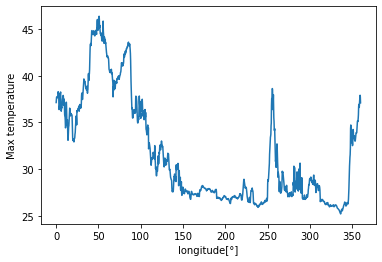

In [26]:
plt.plot(a.longitude, a.max(axis=0))
plt.xlabel('longitude[°]')
plt.ylabel('Max temperature')

## 画图

/usr/local/anaconda3/envs/mylab/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/anaconda3/envs/mylab/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/anaconda3/envs/mylab/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/usr/local/anaconda3/envs/mylab/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibil

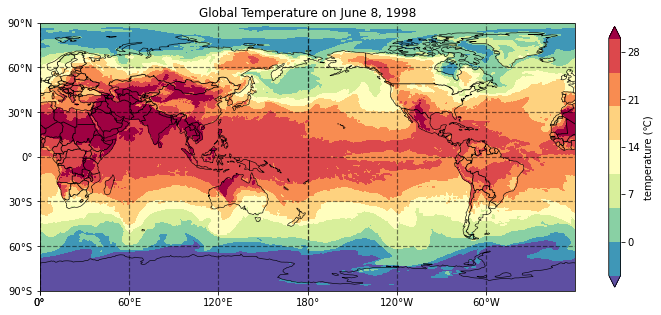

In [8]:
# 创建画图空间
proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
fig = plt.figure(figsize=(12,8))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线
ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
# 标注坐标轴
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
#网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False #关闭顶端标签
gl.ylabels_right = False #关闭右侧标签
gl.xlabels_bottom = False
gl.ylabels_left = False
# zero_direction_label用来设置经度的0度加不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 设置colorbar
cbar_kwargs = {
   'orientation': 'vertical',
   'label': 'temperature (℃)',
   'shrink': 0.6,
   'ticks': np.arange(-35,39,7)
}
levels = np.arange(-5,35,5)
temp[0,:,:].plot.contourf(ax=ax, levels=levels, cmap='Spectral_r',     ### 这就是核心的画图代码
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
ax.set_title("Global Temperature on June 8, 1998")  # Add a title to the axes.
plt.xlabel(None)
plt.ylabel(None)

#fig.show()
plt.savefig('temp.png')  ## 保存下来

## 循环画图

/usr/local/anaconda3/envs/mylab/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/anaconda3/envs/mylab/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/usr/local/anaconda3/envs/mylab/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:319: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/usr/local/anaconda3/envs/mylab/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibil

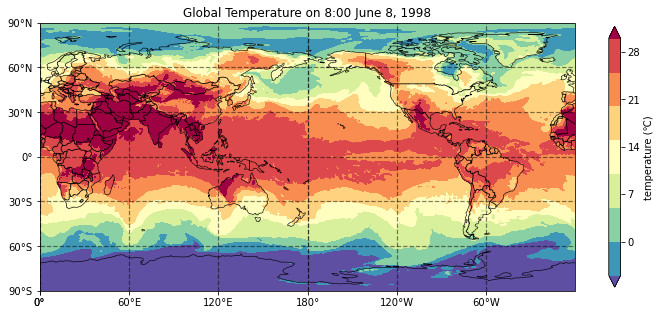

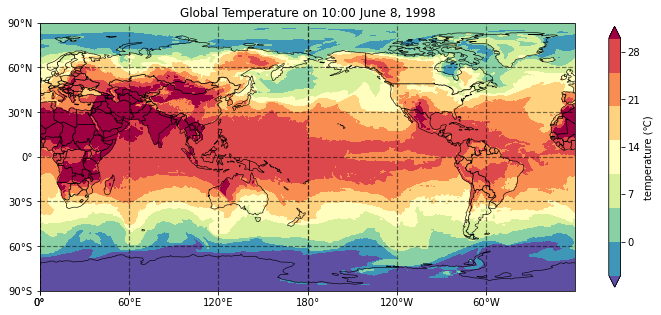

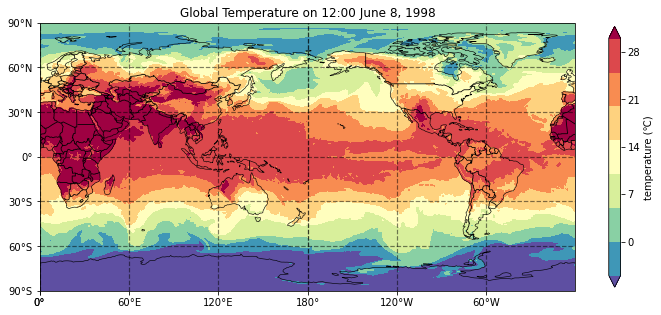

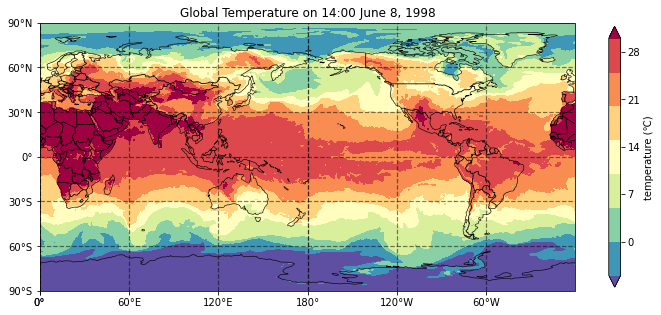

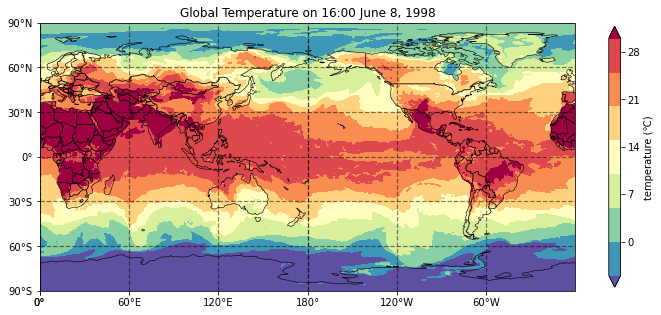

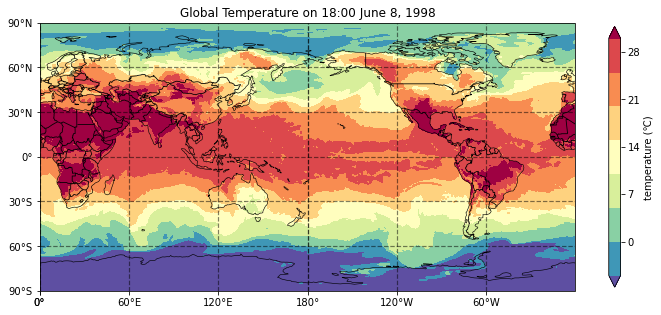

In [27]:
image_list=[]

for i in range(6):
    proj = ccrs.PlateCarree(central_longitude=180)  #创建投影
    fig = plt.figure(figsize=(12,8))  #创建页面
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
    # 设置地图属性:加载国界、海岸线
    ax.add_feature(cfeat.BORDERS.with_scale('110m'), linewidth=0.8, zorder=1) # The Resolution for world suggested to be 110
    ax.add_feature(cfeat.COASTLINE.with_scale('110m'), linewidth=0.6, zorder=1)  
    # 标注坐标轴
    ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    #网格点属性
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
        linewidth=1.2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False #关闭顶端标签
    gl.ylabels_right = False #关闭右侧标签
    gl.xlabels_bottom = False
    gl.ylabels_left = False
    # zero_direction_label用来设置经度的0度加不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    # 设置colorbar
    cbar_kwargs = {
       'orientation': 'vertical',
       'label': 'temperature (℃)',
       'shrink': 0.6,
       'ticks': np.arange(-35,39,7)
    }
    levels = np.arange(-5,35,5)
    temp[i,:,:].plot.contourf(ax=ax, levels=levels, cmap='Spectral_r', 
                              cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
    ax.set_title('Global Temperature on {}:00 June 8, 1998'.format(2*i+8))  # Add a title to the axes.
    plt.xlabel(None)
    plt.ylabel(None)

    #fig.show()
    image_list.append('temp{}.png'.format(i))
    plt.savefig('temp{}.png'.format(i))

## 6张图片转gif

In [9]:
import imageio

In [28]:
def create_gif(image_list, gif_name, duration=0.35):
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name, frames, 'GIF', duration=duration)
    return

def main():
    #image_list = []
    gif_name = 'temp.gif'
    duration = 0.35
    create_gif(image_list, gif_name, duration)

In [29]:
if __name__ == '__main__':
    main()

## 蟹蟹 

获取更多画图请参考官方gallery https://matplotlib.org/stable/gallery/index.html